## Import dependecies and define fuctions

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
from scipy.optimize import curve_fit, fsolve
from scipy.interpolate import make_interp_spline, BSpline
from scipy import interpolate
from scipy.stats import chisquare, chi2_contingency

from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import warnings
warnings.filterwarnings("ignore")

In [2]:
# install lmfit regression module
#! pip install lmfit
from lmfit.models import ConstantModel, StepModel
from lmfit import Model, Minimizer, Parameters, report_fit

## Import data and assign the x, y values 

In [3]:
# import csv data
df0= pd.read_csv("C:/Users/jeja9/APTanalysis/Interfacial_width/Re700/Radius/radius700.csv") 
print(f"shape {df0.shape}\n")
df = df0.iloc[3:]
print(f"shape {df.shape}\n")
df

shape (8, 4)

shape (5, 4)



,time_h,time_s,radius,radius_err
3,4.0,14400,4.557,1.732
4,16.0,57600,7.127,1.986
5,64.0,230400,10.726,3.273
6,256.0,921600,16.223,5.133
7,1024.0,3686400,27.172,6.537


## rate constant and exponent

In [4]:
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()
print(x)
print(y)
print(y_err)

[  14400   57600  230400  921600 3686400]
[ 4.557  7.127 10.726 16.223 27.172]
[1.732 1.986 3.273 5.133 6.537]


### Using lmfit module

In [5]:
# import numpy and lmfit
from numpy import exp, linspace, pi, random, sign, sin

from lmfit import Parameters, fit_report, minimize

# setup the parameters

p_true = Parameters()
p_true.add('A', value=14.0)
p_true.add('period', value=5.46)
p_true.add('shift', value=0.123)
p_true.add('decay', value=0.032)


def residual(params, x, data, eps_data):
    A = params['A']
    p = params['p']
    to = params['to']
    Ro = params['to']

    model =(A*(x-to)+Ro**(1/p))**p

    return (data-model) / eps_data

x = x
data = y
eps_data = y_err

fit_params = Parameters()
fit_params.add('A', value=0.0006, max=1, min=0.00000001)
fit_params.add('p', value=0.3, max=5,  min=0.1)
fit_params.add('to', value=7000, max= 10000, min=0.1)
fit_params.add('Ro', value=3, max= 10, min=0)

min = minimize(residual, fit_params, args=(x, data, eps_data))

print(fit_report(min))
# <end examples/doc_fitting_withreport.py>

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 5
    # variables        = 4
    chi-square         = 36260063.2
    reduced chi-square = 36260063.2
    Akaike info crit   = 86.9839480
    Bayesian info crit = 85.4216996
##  Warning: uncertainties could not be estimated:
    A:   at initial value
    p:   at initial value
    to:  at initial value
    Ro:  at initial value
[[Variables]]
    A:   6.0000e-04 (init = 0.0006)
    p:   0.30000000 (init = 0.3)
    to:  7000.00000 (init = 7000)
    Ro:  3.00000000 (init = 3)


In [6]:
# Define the opwer function
# define a : rate_constant, b: exponent c:logistic Intercept

def power(x, A, p):
    return (A*(x))**p

#create a Model that wraps the power model fuction
pmodel = Model(power)
print('parameter names: {}'.format(pmodel.param_names))

fit_params = Parameters()
fit_params.add('A', value=0.0006, max=1, min=0.00000001)
fit_params.add('p', value=0.3, max=10,  min=0)
#fit_params.add('to', value=7000, max= 10000, min=0)
#fit_params.add('Ro', value=3, max= 10, min=0)
result = pmodel.fit(y, fit_params, x=x)
result.params.items()

parameter names: ['A', 'p']


odict_items([('A', <Parameter 'A', value=0.0055584776346523125 +/- 0.00187, bounds=[1e-08:1]>), ('p', <Parameter 'p', value=0.3314181011957473 +/- 0.0122, bounds=[0:10]>)])

### Using Scipy.curvefit module

In [7]:
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()
print(x)
print(y)
print(y_err)

[  14400   57600  230400  921600 3686400]
[ 4.557  7.127 10.726 16.223 27.172]
[1.732 1.986 3.273 5.133 6.537]


Popt: [6.22230711e-03 3.26975644e-01 1.05259564e+04 4.23706221e+00]
pcov:  [[ 1.89604012e-04 -1.05154496e-03  5.59508854e+09  5.82862776e+05]
 [-1.05154496e-03  5.84514637e-03 -3.08699449e+10 -3.21584577e+06]
 [ 5.59508854e+09 -3.08699449e+10  1.78374295e+23  1.85819646e+19]
 [ 5.82862776e+05 -3.21584577e+06  1.85819646e+19  1.93575765e+15]]

A = 0.006222307111944465 +/- 0.013769677258183096
p = 0.32697564391462647 +/- 0.0764535569393964
to = 10525.956354219075 +/- 422343811873.97656
Ro = 4.237062212022343 +/- 43997245.980865784
R_2: 0.997
chisquare for normdiscrete: chi2 =  0.036


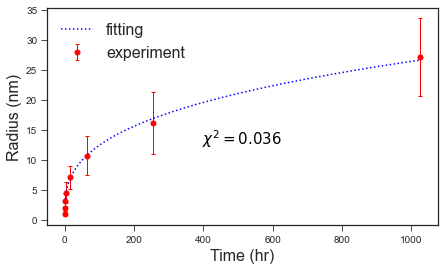

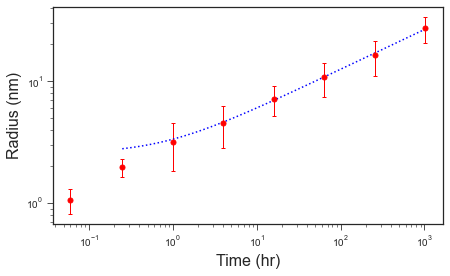

In [8]:
# Define the opwer function
# define a : rate_constant, b: exponent c:logistic Intercept

def power(x, A, p, to, Ro):
    return (A*(x-to)+Ro**(1/p))**p

# fitting power plot with 2sigma
popt, pcov = curve_fit(power, x, y, bounds=([0.000001, 0.001, 0, 0], [0.5, 0.5, 14400, 10]), sigma=y_err) 
print("Popt:", popt)
print("pcov: ", pcov)
print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
print("p =", popt[1], "+/-", pcov[1,1]**0.5)
print("to =", popt[2], "+/-", pcov[2,2]**0.5)
print("Ro =", popt[3], "+/-", pcov[3,3]**0.5)

A = popt[0]
p = popt[1]
to = popt[2]
Ro = popt[3]
sigma= y_err

# Calcualte the R_squared value
best_fit = (A*(x-to)+Ro**(1/p))**p
R_squared = round(r2_score(y, best_fit), 3)
print(f"R_2: {R_squared}")
ch2 = ((y - best_fit)**2/sigma**2).sum()
print('chisquare for normdiscrete: chi2 = %6.3f' % (ch2))

# model_fit with fine scale
xfine = np.linspace(900, 3686400, 100000) 
f2 = (A*(xfine-to)+Ro**(1/p))**p

#time scale from second to hour

x0b = x0/3600
xfineb = xfine/3600

fig, ax = plt.subplots(figsize=(7,4))
#log-log
#ax.loglog(x0b, y0, ['r.'], markersize=10)
#ax.loglog(x2b, f2, 'b:', label=r'fitting')
# linear-linear
ax.errorbar(x0b, y0, y0_err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
ax.plot(xfineb, f2, 'b:', label=r'fitting')
ax.legend(loc='best', fontsize=16)
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel('Radius (nm)', fontsize=16)
#plt.text(0,0, 'Sum of vales = %s\n Total number of entries = %s\n Avg= %s \n Standard Deviation = %s' % (S, N, avg, sigma))
ax.text(0.5, 0.4, r'$\chi^2={:.3f}$'.format(ch2), ha='center', va='center', transform=ax.transAxes, color="k", fontsize=15)
#ax.text(0.5, 0.3, r'p_val={:.4f}'.format(pval), ha='center', va='center', transform=ax.transAxes, color="k", fontsize=15)

plt.show()

fig, ax = plt.subplots(figsize=(7,4))
ax.errorbar(x0b, y0, y0_err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
ax.plot(xfineb, f2, 'b:', label=r'fitting')
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel('Radius (nm)', fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.show()
#plt.savefig("test.png")

## Non-linear curve fit for n =2, 2.4, 3, 4

In [9]:
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()
print(x)
print(y)
print(y_err)

[  14400   57600  230400  921600 3686400]
[ 4.557  7.127 10.726 16.223 27.172]
[1.732 1.986 3.273 5.133 6.537]



exponent value (1/p) = 2
A = 0.00023173932070325102 +/- 5.8783340398433734e-05
to = 6776.579203239707 +/- 2.1247863633420527e-05
Ro = 5.256048932096473 +/- 0.9638400060460393
R_2: 0.964
chisquare for normdiscrete: chi2 =  0.906

exponent value (1/p) = 2.4
A = 0.000857117354631956 +/- 0.00015665979466402042
to = 7474.317254238614 +/- 60259250995.59162
Ro = 4.791307483787903 +/- 2400032.356112167
R_2: 0.985
chisquare for normdiscrete: chi2 =  0.383

exponent value (1/p) = 2.6
A = 0.0016017233878834105 +/- 0.00031599041806389935
to = 7810.980116979889 +/- 86197316325.40077
Ro = 4.5500522943666795 +/- 4701990.072826723
R_2: 0.993
chisquare for normdiscrete: chi2 =  0.205

exponent value (1/p) = 3
A = 0.005264742307899064 +/- 0.00037662103728444815
to = 8507.142244091625 +/- 28871917791.292263
Ro = 4.090053094362641 +/- 3028820.8512788187
R_2: 0.998
chisquare for normdiscrete: chi2 =  0.039

exponent value (1/p) = 4
A = 0.07862434990788929 +/- 0.02464257791827106
to = 10277.390153749264 +/

Text(0, 0.5, '$<R>^p{} $')

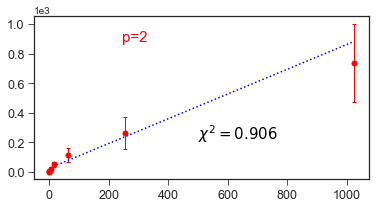

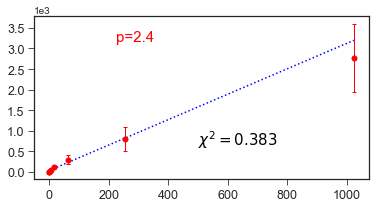

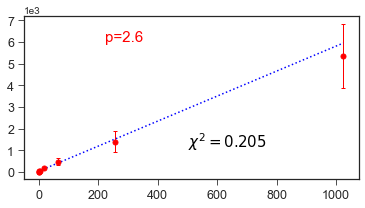

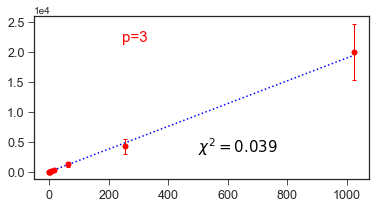

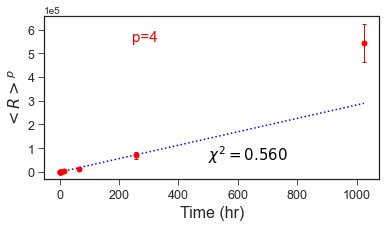

In [10]:
#plot with n= 2, 2.4, 3, 4


for i in [2, 2.4, 2.6, 3, 4]:

    # Define the opwer function
    # define a : rate_constant, b: exponent c:logistic Intercept
    print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A, to, Ro):
        return (A*(x-to)+Ro**(1/p))**p

    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0.000001, 0, 0], [0.5, 14400, 10]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    print("A =", popt[0], "+/-", pcov[0,0]**0.5)
    print("to =", popt[1], "+/-", pcov[1,1]**0.5)
    print("Ro =", popt[2], "+/-", pcov[2,2]**0.5)

    A = popt[0]
    to = popt[1]
    Ro = popt[2]
    sigma= y_err
    
    # Calcualte the chisquare, R_squared value
    best_fit = (A*(x-to)+Ro**(1/p))**p
    R_squared = round(r2_score(y, best_fit), 3)
    print(f"R_2: {R_squared}")
    ch2 = ((y - best_fit)**2/y_err**2).sum()
    print('chisquare for normdiscrete: chi2 = %6.3f' % (ch2))

    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = (A*(xfine-to)+Ro**(1/p))**p

    #time scale change from second to hour

    x0b = x0/3600
    xfineb = xfine/3600
    
    #factorial p for radius (fuction)
    rescale_y0 = y0**i
    rescale_y0err = ((((y0+y0_err)/2)**i)**2-(((y0-y0_err)/2)**i)**2)**0.5
    rescale_f2 =f2**i
    
    fig, ax = plt.subplots(figsize=(6,3))
    #log-log
    #ax.loglog(x0b, y0, ['r.'], markersize=10)
    #ax.loglog(x2b, f2, 'b:', label=r'fitting')
    # linear-linear
    ax.errorbar(x0b, rescale_y0, rescale_y0err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
    ax.plot(xfineb, rescale_f2, 'b:', label=r'fitting')
    #ax.text(0, 28**i, r'p={}'.format(i), color="k", fontsize=16)
    # label in a defalut axes coords
    ax.text(0.3, 0.87, r'p={}'.format(i), ha='center', va='center', transform=ax.transAxes, size=15, color='red')
    ax.text(500, 15**i, r'$\chi^2={:4.3f}$'.format(ch2), color="k", fontsize=15)
    #ax.text(500, 12**i, r'p_val={:.4f}'.format(pval), color="k", fontsize=15)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=12.5)
    plt.yticks(fontsize=12.5)    
    #plt.xlim(0, 70)
    #plt.ylim(0, 14000)
    
plt.xlabel("Time (hr)", fontsize=16)
plt.ylabel(r'$<R>^p{} $', fontsize=16)

## plot Chi_squre versus eponent value 

### with A, p, to, Ro

rsq_max: 0.998
rsq_idmax: 2.907815631262525
1/rsq_idmax: 0.3439007580978635


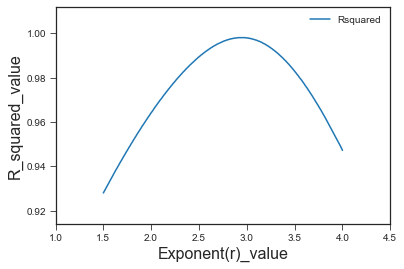


chi_square_min: 0.0360785708491345
chi_square_idmin: 3.05811623246493
1/chi_square_idmin: 0.32699868938401044


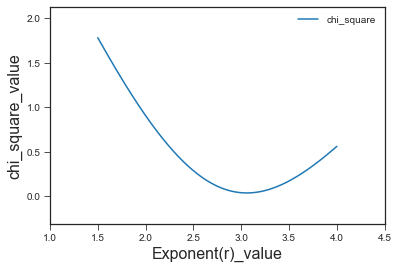

In [11]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq_dict ={}
chi_dict ={}
pval_dict ={}

for i in np.linspace(1.5, 4, 500):

    # Define the opwer function
    # define a : rate_constant, b: exponent c:logistic Intercept
    #print ("\nexponent value (1/p) =", i)
    p = 1/i
    
    def power(x, A, to, Ro):
        return (A*(x-to)+Ro**(1/p))**p

    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0.000001, 0, 0], [0.5, 14400, 10]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    #print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    #print("to =", popt[1], "+/-", pcov[1,1]**0.5)
    #print("Ro =", popt[2], "+/-", pcov[2,2]**0.5)

    A = popt[0]
    to = popt[1]
    Ro = popt[2]
    sigma= y_err
    
    # Calcualte the R_squared value
    best_fit =(A*(x-to)+Ro**(1/p))**p
    R_squared = round(r2_score(y, best_fit), 4)
    #print(f"R_2: {R_squared}")
    ch2 = ((y - best_fit)**2/y_err**2).sum()
    #print('chisquare for normdiscrete: chi2 = %6.3f' % (ch2))
    
    rsq_dict[i] = R_squared
    chi_dict[i] = ch2
    #pval_dict[i] = pval
    
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = (A*(xfine-to)+Ro**(1/p))**p

rsq_df1=pd.DataFrame.from_dict(rsq_dict, orient='index', columns=['Rsquared'])
chi_df1=pd.DataFrame.from_dict(chi_dict, orient='index', columns=['chi_square'])
#pval_df1=pd.DataFrame.from_dict(pval_dict, orient='index', columns=['p_val'])

print("rsq_max:", rsq_df1["Rsquared"].max())
print("rsq_idmax:", rsq_df1["Rsquared"].idxmax())
print("1/rsq_idmax:", 1/rsq_df1["Rsquared"].idxmax())
rsq_df1.plot(y='Rsquared', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "R_squared_value", fontsize=16)
plt.margins(0.2)
plt.show()

#print("\npval_max:", pval_df1["p_val"].max())
#print("pval_idmax:", pval_df1["p_val"].idxmax())
#print("1/pval_idmax:", 1/pval_df1["p_val"].idxmax())


print("\nchi_square_min:", chi_df1["chi_square"].min())
print("chi_square_idmin:", chi_df1["chi_square"].idxmin())
print("1/chi_square_idmin:", 1/chi_df1["chi_square"].idxmin())
chi_df1.plot(y='chi_square', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "chi_square_value", fontsize=16)
plt.margins(0.2)
plt.show()

#pval_df1.plot(y='p_val', kind = 'line')


In [12]:
chi_df1

,chi_square
1.50000,1.781721
1.50501,1.772173
1.51002,1.762635
1.51503,1.753108
1.52004,1.743591
...,...
3.97996,0.541421
3.98497,0.546082
3.98998,0.550755
3.99499,0.555441


### with A, p

rsq_max2: 0.997
rsq_idmax2: 3.0480961923847696
1/rsq_idmax2: 0.32807363576594345


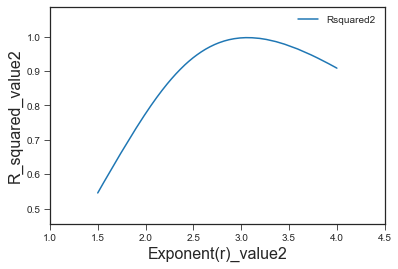


chi_square_min2: 0.042205783432398405
chi_square_idmin2: 3.1332665330661325
1/chi_square_idmin2: 0.3191557403261912


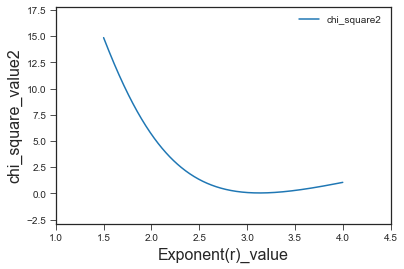

In [13]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq2_dict ={}
lsq2_dict ={}
chi2_dict ={}
#pval2_dict ={}

for i in np.linspace(1.5, 4, 500):

    # Define the opwer function
    # define a : rate_constant, b: exponent c:logistic Intercept
    #print ("\nexponent value (1/p) =", i)
    p = 1/i
    
    def power(x, A):
        return (A*(x))**p

    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0], [1]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    #print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    #print("to =", popt[1], "+/-", pcov[1,1]**0.5)

    A = popt[0]
        
    # Calcualte the R_squared value
    best_fit =(A*(x))**p

    # Calcualte the chi and R_squared values
    R_squared = round(r2_score(y, best_fit), 4)
    #print(f"R_2: {R_squared}")
    lsq = ((y - best_fit)**2).sum()
    ch2 = ((y - best_fit)**2/sigma**2).sum()
    #print('chisquare for normdiscrete: chi2 = %6.3f' % (ch2))
    
    rsq2_dict[i] = R_squared
    lsq2_dict[i] = lsq
    chi2_dict[i] = ch2
    #pval2_dict[i] = pval
    
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = (A*(xfine))**p

rsq_df2=pd.DataFrame.from_dict(rsq2_dict, orient='index', columns=['Rsquared2'])
lsq_df2=pd.DataFrame.from_dict(lsq2_dict, orient='index', columns=['least_square2'])
chi_df2=pd.DataFrame.from_dict(chi2_dict, orient='index', columns=['chi_square2'])
#pval_df2=pd.DataFrame.from_dict(pval2_dict, orient='index', columns=['p_val2'])

print("rsq_max2:", rsq_df2["Rsquared2"].max())
print("rsq_idmax2:", rsq_df2["Rsquared2"].idxmax())
print("1/rsq_idmax2:", 1/rsq_df2["Rsquared2"].idxmax())
rsq_df2.plot(y='Rsquared2', kind = 'line')
plt.xlabel("Exponent(r)_value2", fontsize=16)
plt.ylabel( "R_squared_value2", fontsize=16)
plt.margins(0.2)
plt.show()

'''
print("\nleast_square_min2:", lsq_df2["least_square2"].min())
print("least_square_idmin2:", lsq_df2["least_square2"].idxmin())
print("1/least_square_idmin2:", 1/lsq_df2["least_square2"].idxmin())
lsq_df2.plot(y='least_square2', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "Least_squared_value", fontsize=16)
plt.margins(0.2)
plt.show()'''

print("\nchi_square_min2:", chi_df2["chi_square2"].min())
print("chi_square_idmin2:", chi_df2["chi_square2"].idxmin())
print("1/chi_square_idmin2:", 1/chi_df2["chi_square2"].idxmin())
chi_df2.plot(y='chi_square2', kind = 'line')
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "chi_square_value2", fontsize=16)
plt.margins(0.2)
plt.show()

#pval_df2.plot(y='p_val2', kind = 'line')




chi_square_min: 0.0360785708491345
chi_square_idmin: 3.05811623246493
1/chi_square_idmin: 0.32699868938401044

chi_square_min2: 0.042205783432398405
chi_square_idmin2: 3.1332665330661325
1/chi_square_idmin2: 0.3191557403261912


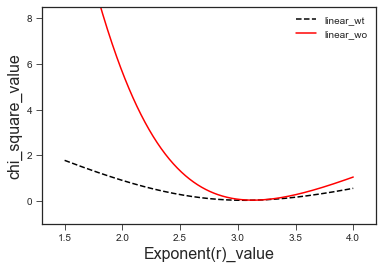

In [14]:
print("\nchi_square_min:", chi_df1["chi_square"].min())
print("chi_square_idmin:", chi_df1["chi_square"].idxmin())
print("1/chi_square_idmin:", 1/chi_df1["chi_square"].idxmin())

print("\nchi_square_min2:", chi_df2["chi_square2"].min())
print("chi_square_idmin2:", chi_df2["chi_square2"].idxmin())
print("1/chi_square_idmin2:", 1/chi_df2["chi_square2"].idxmin())

fig, ax1 = plt.subplots(figsize=(6, 4))
# create shared y axes
chi_df1.plot(y='chi_square', color='k', linestyle= 'dashed', ax =ax1, label = "linear_wt")
chi_df2.plot(y='chi_square2', color='r', kind= 'line', ax =ax1, label = "linear_wo")
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "chi_square_value", fontsize=16)
plt.xlim(1.3, 4.2)
plt.ylim(-1, 8.5)
plt.margins(0.2)
plt.show()

In [15]:
from uncertainties import ufloat
#x = ufloat(1, 0.1)
#exponent_value (1/p) = 3
#A = 0.0039942664008586586 +/- 0.0009278375749382144
#to = 8098.753019922115 +/- 107210907237.25482
#Ro = 4.375821773386308 +/- 7454790.323018013
#R_2: 0.996

A = ufloat(0.003994,  0.00092)
to = ufloat(8098.75301,107210907237.254)
Ro = ufloat(4.375,7454790.32)
R_2= 0.996
    
(A*to)**(1/3)

3.1862173998516234+/-14059664.809772857

In [16]:
-(A*to)+(Ro)**(3)

51.39381485306+/-605473200.3839875

## linear fitting with y_value to the power n
### with to and Ro


exponent value (1/p) = 2

A = 0.00019826056336079583 +/- 2.193494006999575e-05
to = 4335.4915051495445 +/- 1.2738442941538528
Ro = 5.954602680237225 +/- 2.1206558309405628e-05
R_2: 0.9875

exponent value (1/p) = 2.4

A = 0.0007455498743579353 +/- 3.801913836607767e-05
to = 7862.1852436323625 +/- 0.9684958398172907
Ro = 5.6500596607935245 +/- 2.663722244639686e-05
R_2: 0.998

exponent value (1/p) = 2.6

A = 0.0014412700955704924 +/- 8.610501539153031e-05
to = 7587.033566431822 +/- 1007440.6775797334
Ro = 5.2938606583332355 +/- 26150711269.367336
R_2: 0.9996

exponent value (1/p) = 3

A = 0.005370297793726237 +/- 0.000515259650060219
to = 12549.244523537058 +/- 14342110.847110745
Ro = 4.047900661727333 +/- 131279125528.93057
R_2: 0.9981

exponent value (1/p) = 4

A = 0.14084648389349638 +/- 0.01670325826543859
to = 14399.999998381756 +/- 0.0
Ro = 4.049085026394325e-05 +/- 81657.6521918607
R_2: 0.9797


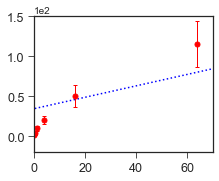

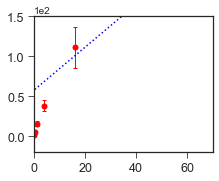

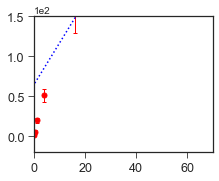

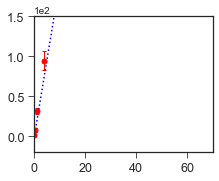

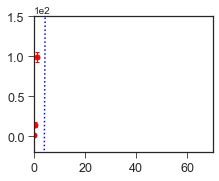

In [17]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y1 = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq3_dict ={}

for i in [2, 2.4, 2.6, 3, 4]:

    # Define the opwer function; a : rate_constant, b: exponent c:logistic Intercept
    print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A, to, Ro):
        return A*(x-to)+Ro**(i)
    
    y = y1**i
   
    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0, 0.00001, 0], [5,  14400, 10]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    print("to =", popt[1], "+/-", pcov[2,2]**0.5)
    print("Ro =", popt[2], "+/-", pcov[1,1]**0.5)

    A = popt[0]
    to = popt[1]
    Ro = popt[2]
    
    # Calcualte the R_squared value
    best_fit =A*(x-to)+Ro**(i)
    R_squared = round(r2_score(y, best_fit), 4)
    print(f"R_2: {R_squared}")
    rsq3_dict[i] = R_squared
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = A*(xfine-to)+Ro**(i)

    #time scale change from second to hour

    x0b = x0/3600
    xfineb = xfine/3600
    
    #factorial p for radius (fuction)
    rescale_y0 = y0**i
    rescale_y0err = ((((y0+y0_err))/2)**2+(((y0-y0_err)**i)/2)**2)**0.5
    rescale_f2 =f2
    
    fig, ax = plt.subplots(figsize=(3.2,2.5))
    #log-log
    #ax.loglog(x0b, y0, ['r.'], markersize=10)
    #ax.loglog(x2b, f2, 'b:', label=r'fitting')
    # linear-linear
    ax.errorbar(x0b, rescale_y0, rescale_y0err, fmt='r.', markersize=10, elinewidth=1, capsize=2,label='experiment')
    ax.plot(xfineb, rescale_f2, 'b:', label=r'fitting')
    #ax.text(0, 28**i, r'p={}'.format(i), color="k", fontsize=16)
    # label in a defalut axes coords
    #ax.text(0.7, 0.87, r'p={}'.format(i), ha='center', va='center', transform=ax.transAxes, size=15, color='red')
    #ax.text(500, 15**i, r'$\xi^2={}$'.format(R_squared), color="k", fontsize=15)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=12.5)
    plt.yticks(fontsize=12.5)    
    plt.xlim(0, 70)
    plt.ylim(-20, 150)
    
#plt.xlabel("Time (hr)", fontsize=16)
#plt.ylabel(r'$<R>^p{} $', fontsize=16)

In [18]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y1 = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq3_dict ={}

for i in np.linspace(1.5, 4, 500):

    # Define the opwer function; a : rate_constant, b: exponent c:logistic Intercept
    print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A, to, Ro):
        return A*(x-to)+Ro**(1/p)
    
    y = y1**i
   
    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([-1, 0.00001, 0], [2,  14400, 10]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    #print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    #print("to =", popt[1], "+/-", pcov[2,2]**0.5)
    #print("Ro =", popt[2], "+/-", pcov[1,1]**0.5)

    A = popt[0]
    to = popt[1]
    Ro = popt[2]
    AtoR= (popt[2]**i)-popt[0]*popt[1]
    #print("AtoR =", AtoR)
    
    # Calcualte the R_squared value
    best_fit =A*(x-to)+Ro**(1/p)
    R_squared = round(r2_score(y, best_fit), 4)
    print(f"R_2: {R_squared}")
    rsq3_dict[i] = R_squared
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = A*(xfine-to)+Ro**(1/p)

rsq_df3=pd.DataFrame.from_dict(rsq3_dict, orient='index',
                       columns=['Rsquared3'])



exponent value (1/p) = 1.5
R_2: 0.9536

exponent value (1/p) = 1.5050100200400802
R_2: 0.9541

exponent value (1/p) = 1.5100200400801602
R_2: 0.9546

exponent value (1/p) = 1.5150300601202404
R_2: 0.955

exponent value (1/p) = 1.5200400801603207
R_2: 0.9555

exponent value (1/p) = 1.5250501002004009
R_2: 0.956

exponent value (1/p) = 1.5300601202404809
R_2: 0.9565

exponent value (1/p) = 1.535070140280561
R_2: 0.957

exponent value (1/p) = 1.5400801603206413
R_2: 0.9574

exponent value (1/p) = 1.5450901803607215
R_2: 0.9579

exponent value (1/p) = 1.5501002004008015
R_2: 0.9583

exponent value (1/p) = 1.5551102204408818
R_2: 0.9588

exponent value (1/p) = 1.560120240480962
R_2: 0.9593

exponent value (1/p) = 1.565130260521042
R_2: 0.9597

exponent value (1/p) = 1.5701402805611222
R_2: 0.9601

exponent value (1/p) = 1.5751503006012024
R_2: 0.9606

exponent value (1/p) = 1.5801603206412826
R_2: 0.961

exponent value (1/p) = 1.5851703406813626
R_2: 0.9615

exponent value (1/p) = 1.590180


exponent value (1/p) = 2.3717434869739478
R_2: 0.9976

exponent value (1/p) = 2.376753507014028
R_2: 0.9977

exponent value (1/p) = 2.381763527054108
R_2: 0.9977

exponent value (1/p) = 2.3867735470941884
R_2: 0.9978

exponent value (1/p) = 2.3917835671342687
R_2: 0.9979

exponent value (1/p) = 2.396793587174349
R_2: 0.9979

exponent value (1/p) = 2.401803607214429
R_2: 0.998

exponent value (1/p) = 2.406813627254509
R_2: 0.9981

exponent value (1/p) = 2.411823647294589
R_2: 0.9981

exponent value (1/p) = 2.4168336673346693
R_2: 0.9982

exponent value (1/p) = 2.4218436873747495
R_2: 0.9982

exponent value (1/p) = 2.4268537074148298
R_2: 0.9983

exponent value (1/p) = 2.4318637274549095
R_2: 0.9984

exponent value (1/p) = 2.4368737474949898
R_2: 0.9984

exponent value (1/p) = 2.44188376753507
R_2: 0.9985

exponent value (1/p) = 2.44689378757515
R_2: 0.9985

exponent value (1/p) = 2.4519038076152304
R_2: 0.9986

exponent value (1/p) = 2.4569138276553106
R_2: 0.9986

exponent value (1/p)


exponent value (1/p) = 3.1332665330661325
R_2: 0.9967

exponent value (1/p) = 3.1382765531062127
R_2: 0.9967

exponent value (1/p) = 3.1432865731462925
R_2: 0.9966

exponent value (1/p) = 3.1482965931863727
R_2: 0.9966

exponent value (1/p) = 3.153306613226453
R_2: 0.9965

exponent value (1/p) = 3.1583166332665327
R_2: 0.9964

exponent value (1/p) = 3.163326653306613
R_2: 0.9964

exponent value (1/p) = 3.168336673346693
R_2: 0.9963

exponent value (1/p) = 3.1733466933867733
R_2: 0.9962

exponent value (1/p) = 3.1783567134268536
R_2: 0.9962

exponent value (1/p) = 3.1833667334669338
R_2: 0.9961

exponent value (1/p) = 3.188376753507014
R_2: 0.996

exponent value (1/p) = 3.193386773547094
R_2: 0.996

exponent value (1/p) = 3.1983967935871744
R_2: 0.9959

exponent value (1/p) = 3.2034068136272547
R_2: 0.9958

exponent value (1/p) = 3.208416833667335
R_2: 0.9957

exponent value (1/p) = 3.2134268537074147
R_2: 0.9956

exponent value (1/p) = 3.218436873747495
R_2: 0.9956

exponent value (1/


exponent value (1/p) = 3.964929859719439
R_2: 0.9805

exponent value (1/p) = 3.969939879759519
R_2: 0.9804

exponent value (1/p) = 3.974949899799599
R_2: 0.9803

exponent value (1/p) = 3.979959919839679
R_2: 0.9802

exponent value (1/p) = 3.9849699398797593
R_2: 0.9801

exponent value (1/p) = 3.9899799599198396
R_2: 0.98

exponent value (1/p) = 3.99498997995992
R_2: 0.9798

exponent value (1/p) = 4.0
R_2: 0.9797


### without to and Ro

In [19]:
#plot with n= 1.5-4
# assigne x and y values
x0 = df0['time_s'].to_numpy()
y0 = df0['radius'].to_numpy()
y0_err = df0['radius_err'].to_numpy()
x = df['time_s'].to_numpy()
y1 = df['radius'].to_numpy()
y_err = df['radius_err'].to_numpy()

rsq4_dict ={}

for i in np.linspace(1.5, 4, 200):

    # Define the opwer function; a : rate_constant, b: exponent c:logistic Intercept
    print ("\nexponent value (1/p) =", i)
    p = 1/i
    def power(x, A):
        return A*(x)
    
    y = y1**i
   
    # fitting power plot with 2sigma
    popt, pcov = curve_fit(power, x, y, bounds=([0], [10]), sigma=y_err) 
    #print("Popt:", popt)
    #print("pcov: ", pcov)
    #print("\nA =", popt[0], "+/-", pcov[0,0]**0.5)
    #print("to =", popt[1], "+/-", pcov[1,1]**0.5)
    #print("Ro =", popt[2], "+/-", pcov[2,2]**0.5)

    A = popt[0]

    
    # Calcualte the R_squared value
    best_fit =A*(x)
    R_squared = round(r2_score(y, best_fit), 4)
    print(f"R_2: {R_squared}")
    rsq4_dict[i] = R_squared
    # model_fit with fine scale
    xfine = np.linspace(900, 3686400, 100000) 
    f2 = A*(xfine)

rsq_df4=pd.DataFrame.from_dict(rsq4_dict, orient='index',
                       columns=['Rsquared4'])

print("\n", rsq_df4["Rsquared4"].max())
print(rsq_df4["Rsquared4"].idxmax())
print(1/rsq_df4["Rsquared4"].idxmax())



exponent value (1/p) = 1.5
R_2: 0.8242

exponent value (1/p) = 1.5125628140703518
R_2: 0.8304

exponent value (1/p) = 1.5251256281407035
R_2: 0.8364

exponent value (1/p) = 1.5376884422110553
R_2: 0.8422

exponent value (1/p) = 1.550251256281407
R_2: 0.8478

exponent value (1/p) = 1.5628140703517588
R_2: 0.8532

exponent value (1/p) = 1.5753768844221105
R_2: 0.8584

exponent value (1/p) = 1.5879396984924623
R_2: 0.8635

exponent value (1/p) = 1.600502512562814
R_2: 0.8684

exponent value (1/p) = 1.6130653266331658
R_2: 0.8731

exponent value (1/p) = 1.6256281407035176
R_2: 0.8777

exponent value (1/p) = 1.6381909547738693
R_2: 0.8821

exponent value (1/p) = 1.650753768844221
R_2: 0.8864

exponent value (1/p) = 1.6633165829145728
R_2: 0.8906

exponent value (1/p) = 1.6758793969849246
R_2: 0.8946

exponent value (1/p) = 1.6884422110552764
R_2: 0.8984

exponent value (1/p) = 1.7010050251256281
R_2: 0.9022

exponent value (1/p) = 1.7135678391959799
R_2: 0.9058

exponent value (1/p) = 1.72


exponent value (1/p) = 3.3969849246231156
R_2: 0.9916

exponent value (1/p) = 3.409547738693467
R_2: 0.9914

exponent value (1/p) = 3.422110552763819
R_2: 0.9911

exponent value (1/p) = 3.434673366834171
R_2: 0.9909

exponent value (1/p) = 3.4472361809045227
R_2: 0.9906

exponent value (1/p) = 3.459798994974874
R_2: 0.9903

exponent value (1/p) = 3.472361809045226
R_2: 0.9901

exponent value (1/p) = 3.484924623115578
R_2: 0.9898

exponent value (1/p) = 3.4974874371859297
R_2: 0.9896

exponent value (1/p) = 3.5100502512562817
R_2: 0.9893

exponent value (1/p) = 3.522613065326633
R_2: 0.989

exponent value (1/p) = 3.535175879396985
R_2: 0.9887

exponent value (1/p) = 3.5477386934673367
R_2: 0.9885

exponent value (1/p) = 3.5603015075376887
R_2: 0.9882

exponent value (1/p) = 3.5728643216080402
R_2: 0.9879

exponent value (1/p) = 3.585427135678392
R_2: 0.9877

exponent value (1/p) = 3.5979899497487438
R_2: 0.9874

exponent value (1/p) = 3.6105527638190957
R_2: 0.9871

exponent value (1/p

Rsquared_value for linear plot

df3_rsquared_max (with): 0.9997
df3_rsquared_maxid: 2.632264529058116
1/df3_rsquared_maxid: 0.3799010277883517

df4_rsquared_max (wo): 0.9994
df4_rsquared_maxid: 2.7311557788944727
1/df4_rsquared_maxid: 0.3661453541858325


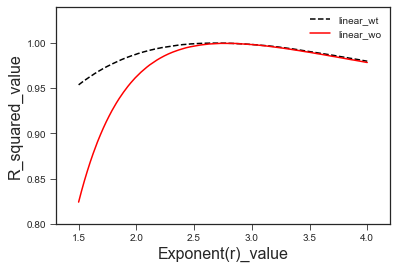

In [20]:
print("Rsquared_value for linear plot\n")
print("df3_rsquared_max (with):", rsq_df3["Rsquared3"].max())
print("df3_rsquared_maxid:",rsq_df3["Rsquared3"].idxmax())
print("1/df3_rsquared_maxid:", 1/rsq_df3["Rsquared3"].idxmax())

print("\ndf4_rsquared_max (wo):", rsq_df4["Rsquared4"].max())
print("df4_rsquared_maxid:",rsq_df4["Rsquared4"].idxmax())
print("1/df4_rsquared_maxid:", 1/rsq_df4["Rsquared4"].idxmax())

fig, ax3 = plt.subplots(figsize=(6, 4))
# create shared y axes
rsq_df3.plot(y='Rsquared3', color='k', linestyle='dashed', ax =ax3, label = "linear_wt")
rsq_df4.plot(y='Rsquared4', color='r', kind = 'line', ax =ax3, label = "linear_wo")
plt.xlabel("Exponent(r)_value", fontsize=16)
plt.ylabel( "R_squared_value", fontsize=16)
plt.xlim(1.3, 4.2)
plt.ylim(0.8, 1.04)
plt.margins(0.2)
plt.show()

###### 